In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins

In [9]:
products = pd.read_csv('products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [10]:
orders = pd.read_csv('orders.csv')
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


In [13]:
order_products = pd.read_csv('order_products.csv')
order_products

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
...,...,...,...
33819101,3421063,14233,3
33819102,3421063,35548,4
33819103,3421070,35951,1
33819104,3421070,16953,2


In [ ]:
departments = pd.read_csv('departments.csv')
departments
#departments.info()

In [7]:
aisles = pd.read_csv('aisles.csv')
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [8]:
join_table=pd.merge(order_products,orders,on=['order_id'])

In [9]:
join_table1=pd.merge(join_table,products,on=['product_id'])

In [10]:
join_table2=pd.merge(join_table1,aisles,on=['aisle_id'])

In [11]:
join_table3=pd.merge(join_table2,departments,on=['department_id'])
join_table3
#add_to_cart_order加入购物车的顺序 
#order_number一个user名下的单号的顺序
#order——dow day of week 一周中第几天下的单

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,153404,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,23750,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,58707,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,166654,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2909991,18001,5,80613,10,0,11,2.0,Dried Porcini Mushroom,6,2,other,other
33819102,3016581,46404,1,132609,8,5,14,2.0,Cotes De Provence Rose,6,2,other,other
33819103,3326955,46404,1,132609,7,3,15,2.0,Cotes De Provence Rose,6,2,other,other
33819104,3340423,46404,3,103807,12,6,14,4.0,Cotes De Provence Rose,6,2,other,other


In [6]:
join_table_to_csv = pd.read_csv('join_table_to_csv.csv')

In [7]:
new_data=join_table_to_csv[['user_id','aisle','order_id']]
new_data

,user_id,aisle,order_id
0,202279,eggs,2
1,153404,eggs,26
2,23750,eggs,120
3,58707,eggs,327
4,166654,eggs,390
...,...,...,...
33819101,80613,other,2909991
33819102,132609,other,3016581
33819103,132609,other,3326955
33819104,103807,other,3340423


In [139]:
pivot = pd.pivot_table(new_data,index='user_id',columns='aisle',values='order_id',aggfunc=np.size)
pivot

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
206206,NaN,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
206207,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,2.0,1.0,NaN,NaN,11.0,NaN,15.0


In [140]:
pivot1 = pivot.fillna(0)

In [141]:
#purchase = pd.merge(pivot1,orders,on=['user_id'])

In [142]:
pivot1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0


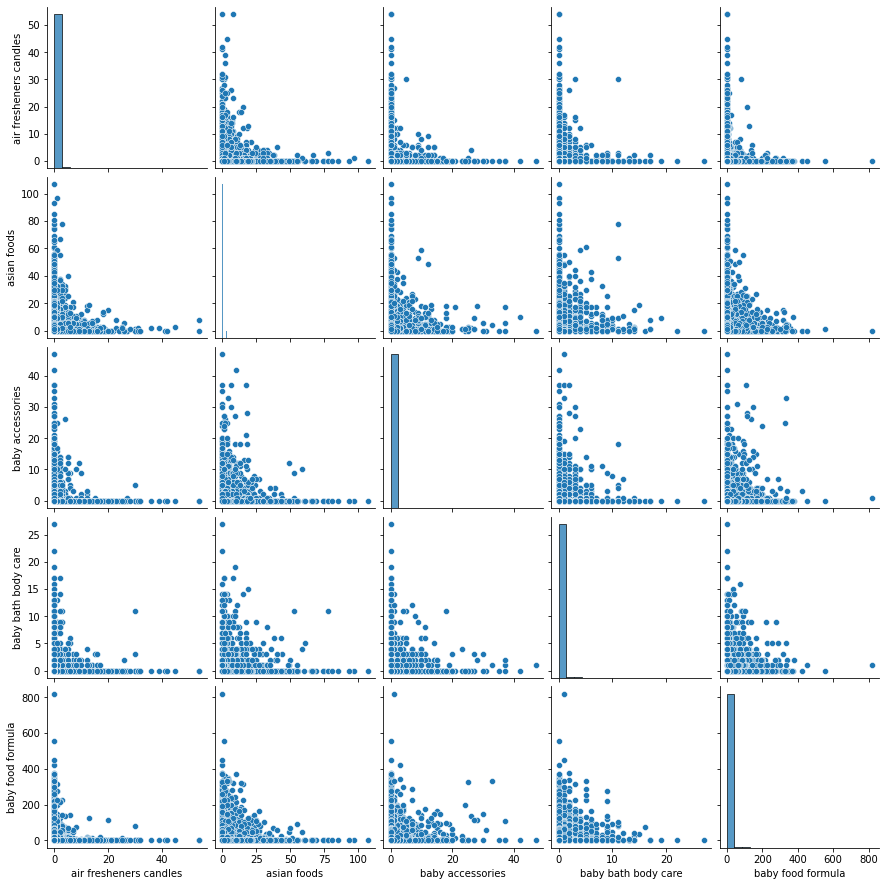

In [26]:
sns.pairplot(pivot1.iloc[:,range(5)])

In [10]:
#binary
binary_data = pivot1.astype(bool).astype(int)
binary_data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
206206,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
206207,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,1,0,0,1,0,1


In [11]:
from sklearn import preprocessing
X=binary_data.values[:,1:]
x_scaled = preprocessing.scale(X)
x_scaled

array([[-0.62324566, -0.13254177, -0.15855659, ..., -0.99619074,
        -0.18060937,  0.78838308],
       [ 1.60450376, -0.13254177, -0.15855659, ...,  1.00382383,
        -0.18060937,  0.78838308],
       [-0.62324566, -0.13254177, -0.15855659, ...,  1.00382383,
        -0.18060937, -1.26841891],
       ...,
       [-0.62324566, -0.13254177, -0.15855659, ...,  1.00382383,
        -0.18060937,  0.78838308],
       [ 1.60450376, -0.13254177, -0.15855659, ..., -0.99619074,
        -0.18060937,  0.78838308],
       [ 1.60450376, -0.13254177, -0.15855659, ..., -0.99619074,
        -0.18060937,  0.78838308]])

In [12]:
norm_binary_data = pd.DataFrame(x_scaled)
norm_binary_data

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383
1,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,2.529826,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,0.788383
2,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,-1.268419
3,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,1.572390,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,-1.268419
4,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-0.623246,7.544791,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383
206205,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,3.507801,-0.147983,-0.204506,-0.308878,...,1.194064,-0.603433,-0.395284,-0.635975,-0.250591,3.179215,-0.338652,1.003824,-0.180609,-1.268419
206206,-0.623246,-0.132542,-0.158557,2.598335,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,-0.395284,1.572390,3.990561,-0.314543,-0.338652,1.003824,-0.180609,0.788383
206207,1.604504,-0.132542,-0.158557,2.598335,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,-0.603433,-0.395284,1.572390,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383


In [20]:
## to do PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components=5)
#principalComponents = pca.fit_transform(norm_binary_data)
#principalDf = pd.DataFrame(data = principalComponents 
# , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [21]:
#principalDf.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
206204,-2.036383,-1.826364,-0.827340,0.056016,0.064411
206205,5.014457,1.968338,-0.417436,0.154985,0.225077
206206,4.421203,-2.941525,0.103344,-2.265580,-0.764451
206207,8.341809,-2.558728,0.321858,-0.749565,-0.126985
206208,3.384890,0.027599,0.003542,1.239264,-0.199720


In [13]:
sample_data=norm_binary_data.sample(frac=0.01, replace=False, random_state=None)
sample_data

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
173493,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,2.529826,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,0.788383
199390,-0.623246,7.544791,-0.158557,2.598335,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,-0.395284,-0.635975,-0.250591,-0.314543,2.952881,1.003824,-0.180609,0.788383
201939,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,-1.268419
180799,-0.623246,-0.132542,-0.158557,2.598335,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,-0.395284,1.572390,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,0.788383
24225,-0.623246,-0.132542,-0.158557,2.598335,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,0.788383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,0.788383
57137,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,1.657184,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,-1.268419
48792,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,1.657184,-0.395284,-0.635975,-0.250591,3.179215,2.952881,1.003824,-0.180609,-1.268419
79630,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,3.990561,-0.314543,-0.338652,1.003824,-0.180609,-1.268419


In [14]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(sample_data)
    wcss.append(kmeans.inertia_)
wcss

[275152.8136868138,
 254554.25793012613,
 248314.6824340552,
 244180.99503325578,
 240970.4168635851,
 238245.36747603046,
 236289.45516787944,
 234789.74766957635,
 233550.11789941115]

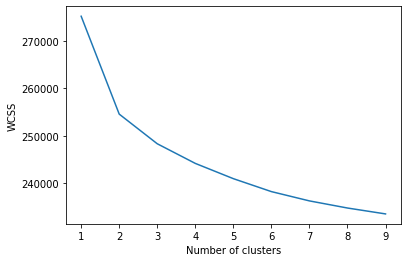

In [15]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
from sklearn.cluster import KMeans
kmeans_new = KMeans(6)
kmeans.fit(norm_binary_data)
#cluster_new = pivot1.copy()
norm_binary_data['cluster_pred'] = kmeans_new.fit_predict(norm_binary_data)
norm_binary_data
#principalDf['cluster_pred']

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,cluster_pred
0,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383,3
1,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,1.657184,2.529826,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,0.788383,4
2,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.657184,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,-1.268419,5
3,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.603433,-0.395284,1.572390,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,-1.268419,1
4,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-0.623246,7.544791,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383,5
206205,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,3.507801,-0.147983,-0.204506,-0.308878,...,-0.603433,-0.395284,-0.635975,-0.250591,3.179215,-0.338652,1.003824,-0.180609,-1.268419,0
206206,-0.623246,-0.132542,-0.158557,2.598335,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.657184,-0.395284,1.572390,3.990561,-0.314543,-0.338652,1.003824,-0.180609,0.788383,4
206207,1.604504,-0.132542,-0.158557,2.598335,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.603433,-0.395284,1.572390,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383,2


In [93]:
pivot1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0


In [101]:
pivot2 = pivot1.insert(pivot1.shape[1],'cluster', norm_binary_data['cluster_pred'])
pivot2

ValueError: cannot insert cluster, already exists

In [102]:
pivot2.isnull().sum()


AttributeError: 'NoneType' object has no attribute 'isnull'

In [38]:
pivot1['cluster']=pivot1['cluster'].fillna(1)

In [41]:
pivot1_to_csv = pivot1.to_csv('pivot1_to_csv.csv')

In [60]:
pivot1.loc[:,'cluster'].value_counts()

5.0    70679
3.0    47255
4.0    47158
2.0    19704
0.0    14374
1.0     7039
Name: cluster, dtype: int64

In [53]:
a=pivot1.groupby(['cluster']).aggregate("sum").reset_index()
a.T

,0,1,2,3,4,5
aisle,,,,,,
cluster,0.0,1.0,2.0,3.0,4.0,5.0
air fresheners candles,1523.0,782.0,2009.0,4663.0,4882.0,7059.0
asian foods,12237.0,5848.0,16726.0,39838.0,39681.0,59284.0
baby accessories,592.0,253.0,805.0,1902.0,2003.0,2911.0
baby bath body care,617.0,314.0,884.0,1930.0,2068.0,3096.0
...,...,...,...,...,...,...
trash bags liners,2342.0,1187.0,3270.0,7790.0,7506.0,11607.0
vitamins supplements,2975.0,1616.0,4464.0,10763.0,11133.0,16077.0
water seltzer sparkling water,60524.0,29964.0,84777.0,201374.0,202613.0,298898.0


In [170]:
a.T.iloc[:,0].sort_values().tail(10)

aisle
bread                             43271.0
soy lactosefree                   45973.0
chips pretzels                    53897.0
water seltzer sparkling water     60524.0
milk                              64479.0
packaged cheese                   71425.0
yogurt                           102962.0
packaged vegetables fruits       130019.0
fresh vegetables                 247573.0
fresh fruits                     263813.0
Name: 0, dtype: float64

In [171]:
a.T.iloc[:,1].sort_values().tail(10)

aisle
bread                             21049.0
soy lactosefree                   22711.0
chips pretzels                    26303.0
water seltzer sparkling water     29964.0
milk                              31708.0
packaged cheese                   35310.0
yogurt                            53807.0
packaged vegetables fruits        62924.0
fresh vegetables                 123748.0
fresh fruits                     130082.0
Name: 1, dtype: float64

In [172]:
a.T.iloc[:,2].sort_values().tail(10)

aisle
bread                             58482.0
soy lactosefree                   62993.0
chips pretzels                    71401.0
water seltzer sparkling water     84777.0
milk                              86388.0
packaged cheese                   96109.0
yogurt                           142303.0
packaged vegetables fruits       175636.0
fresh vegetables                 337335.0
fresh fruits                     359534.0
Name: 2, dtype: float64

In [173]:
a.T.iloc[:,3].sort_values().tail(10)

aisle
refrigerated                     138670.0
soy lactosefree                  152511.0
chips pretzels                   172270.0
water seltzer sparkling water    201374.0
milk                             213583.0
packaged cheese                  232818.0
yogurt                           342369.0
packaged vegetables fruits       421812.0
fresh vegetables                 821628.0
fresh fruits                     869518.0
Name: 3, dtype: float64

In [174]:
a.T.iloc[:,4].sort_values().tail(10)

aisle
bread                            139054.0
soy lactosefree                  152316.0
chips pretzels                   174403.0
water seltzer sparkling water    202613.0
milk                             213476.0
packaged cheese                  238704.0
yogurt                           349806.0
packaged vegetables fruits       425349.0
fresh vegetables                 816444.0
fresh fruits                     872845.0
Name: 4, dtype: float64

In [175]:
a.T.iloc[:,5].sort_values().tail(10)

aisle
bread                             208217.0
soy lactosefree                   227989.0
chips pretzels                    255465.0
water seltzer sparkling water     298898.0
milk                              314025.0
packaged cheese                   347096.0
yogurt                            516336.0
packaged vegetables fruits        628066.0
fresh vegetables                 1221902.0
fresh fruits                     1296869.0
Name: 5, dtype: float64

In [29]:
## to do PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(norm_binary_data)
principalDfagain = pd.DataFrame(data = principalComponents 
 , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6'])
principalDfagain

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-3.819931,1.213887,-0.864169,-0.880229,0.852546,-0.226917
1,1.517411,0.145461,-2.700240,-1.661326,2.803106,0.210273
2,-3.163788,-0.728854,-0.847498,-0.679012,0.249765,-1.197747
3,-3.414073,4.114882,4.063200,-0.769117,2.929220,0.403620
4,-2.945663,-1.948305,0.561168,0.869468,-0.617967,-1.213782
...,...,...,...,...,...,...
206204,-2.301742,-2.102760,-0.787287,0.088117,0.066963,-0.956466
206205,5.561340,2.692332,-0.392578,0.194191,0.199419,-0.250490
206206,4.203059,-3.235453,0.177653,-2.223919,-0.648945,0.519770
206207,8.408629,-2.361647,0.541525,-0.700384,0.071064,1.043296


In [30]:
finalDf = pd.concat([principalDfagain, norm_binary_data[['cluster_pred']]], axis =1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,cluster_pred
0,-3.819931,1.213887,-0.864169,-0.880229,0.852546,-0.226917,3
1,1.517411,0.145461,-2.700240,-1.661326,2.803106,0.210273,4
2,-3.163788,-0.728854,-0.847498,-0.679012,0.249765,-1.197747,5
3,-3.414073,4.114882,4.063200,-0.769117,2.929220,0.403620,1
4,-2.945663,-1.948305,0.561168,0.869468,-0.617967,-1.213782,5
...,...,...,...,...,...,...,...
206204,-2.301742,-2.102760,-0.787287,0.088117,0.066963,-0.956466,5
206205,5.561340,2.692332,-0.392578,0.194191,0.199419,-0.250490,0
206206,4.203059,-3.235453,0.177653,-2.223919,-0.648945,0.519770,4
206207,8.408629,-2.361647,0.541525,-0.700384,0.071064,1.043296,2


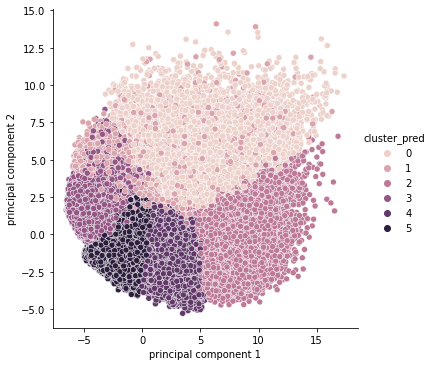

In [31]:
sns.relplot(x="principal component 1", y="principal component 2", hue="cluster_pred", data=finalDf)

In [143]:
#log
log_data = np.log(pivot1)
log_data

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,0.000000,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.693147
2,-inf,1.098612,-inf,-inf,-inf,-inf,0.693147,-inf,-inf,-inf,...,1.098612,0.000000,0.0,-inf,-inf,-inf,-inf,0.693147,-inf,3.737670
3,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,1.386294,0.000000,-inf,-inf,-inf,-inf,-inf,0.693147,-inf,-inf
4,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,0.000000,-inf,-inf,-inf,0.000000,-inf,-inf
5,0.0,1.386294,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,2.197225
206206,-inf,1.386294,-inf,-inf,-inf,-inf,1.386294,0.0,-inf,-inf,...,0.000000,-inf,-inf,-inf,-inf,0.0,-inf,0.000000,-inf,-inf
206207,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf,-inf,-inf,...,1.098612,1.386294,-inf,0.693147,0.0,-inf,-inf,2.397895,-inf,2.708050


In [211]:
log_data_new = log_data.replace(float('-inf'),0)
log_data_new

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.693147
2,0.0,1.098612,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.0,...,1.098612,0.000000,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,3.737670
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.386294,0.000000,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,1.386294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.197225
206206,0.0,1.386294,0.0,0.0,0.000000,0.0,1.386294,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
206207,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.098612,1.386294,0.0,0.693147,0.0,0.0,0.0,2.397895,0.0,2.708050


In [145]:
from sklearn import preprocessing
X_log=log_data_new.values[:,1:]
x_scaled_log = preprocessing.scale(X_log)
x_scaled_log

array([[-0.37891587, -0.0736353 , -0.0837558 , ..., -0.66968741,
        -0.12518684, -0.28906001],
       [ 1.71139145, -0.0736353 , -0.0837558 , ..., -0.02395543,
        -0.12518684,  2.14345438],
       [-0.37891587, -0.0736353 , -0.0837558 , ..., -0.02395543,
        -0.12518684, -0.84287117],
       ...,
       [-0.37891587, -0.0736353 , -0.0837558 , ...,  1.56417824,
        -0.12518684,  1.32080843],
       [ 1.71139145, -0.0736353 , -0.0837558 , ..., -0.66968741,
        -0.12518684,  1.95077057],
       [-0.37891587, -0.0736353 , -0.0837558 , ..., -0.66968741,
        -0.12518684,  0.03489875]])

In [146]:
norm_log_data = pd.DataFrame(x_scaled_log)
norm_log_data

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.501606,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.289060
1,1.711391,-0.073635,-0.083756,-0.297621,-0.156389,0.426751,-0.140444,-0.066698,-0.142348,-0.188319,...,1.112894,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.023955,-0.125187,2.143454
2,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,1.535666,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.023955,-0.125187,-0.842871
3,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.501606,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.842871
4,2.258758,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.501606,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,0.034899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.501606,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,0.912669
206205,2.258758,-0.073635,-0.083756,-0.297621,-0.156389,1.387103,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.501606,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.842871
206206,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,1.112894,1.765207,-0.268815,0.812762,-0.150803,-0.163498,-0.189037,1.564178,-0.125187,1.320808
206207,1.711391,-0.073635,-0.083756,1.148069,-0.156389,1.387103,-0.140444,-0.066698,-0.142348,-0.188319,...,1.863594,-0.382093,-0.268815,2.992025,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,1.950771


In [118]:
sample_data_log=norm_log_data.sample(frac=0.01, replace=False, random_state=None)
sample_data_log

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
99342,-0.378916,-0.073635,-0.083756,1.148069,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,1.509678,-1.003938,-0.890326
184273,2.258758,-0.073635,-0.083756,-0.297621,-0.156389,0.988521,-0.140444,-0.066698,-0.142348,-0.188319,...,1.135959,2.018536,-0.150803,-0.163498,-0.189037,2.166572,-0.125187,-0.842871,0.406096,-0.890326
134903,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,1.564178,-0.125187,0.264751,0.406096,0.588023
158518,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.842871,-2.413972,0.588023
62360,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.842871,0.860025,0.588023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177312,2.258758,-0.073635,-0.083756,-0.297621,-0.156389,0.988521,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,4.193891,-0.163498,-0.189037,-0.669687,-0.125187,1.372373,0.860025,-0.890326
192430,3.577595,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,0.621777,-0.125187,0.818562,0.860025,0.588023
27639,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,0.829656,-0.125187,-0.842871,0.406096,0.588023
138899,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,1.387103,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,2.529396,-0.125187,2.492383,0.860025,-2.368674


In [77]:
from sklearn.cluster import KMeans
wcss_log = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(sample_data_log)
    wcss_log.append(kmeans.inertia_)
wcss_log

[275261.7595401708,
 250775.16599107705,
 243448.75867028677,
 239652.0064731333,
 236854.9719284273,
 234661.81232205746,
 232723.6750377225,
 230668.65078225508,
 229205.3726901916,
 227741.031360223,
 226593.9254588331,
 224940.4958233318,
 223112.73926114154,
 221683.73955335122,
 220596.4413030905,
 219336.75756540877,
 217299.23659613027,
 216445.00895189773,
 215432.19412512117,
 215200.66787575558,
 212522.84231972558,
 211253.25870403933,
 211105.51065365315,
 208902.70760764877,
 208566.28532756856,
 207246.32916224582,
 206734.0407455418,
 205567.9765223618,
 205199.93878057066]

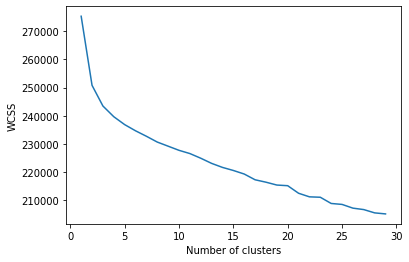

In [78]:
plt.plot(range(1,30), wcss_log)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [212]:

kmeans_new = KMeans(4)
kmeans.fit(norm_log_data)


norm_log_data['cluster_pred'] = kmeans_new.fit_predict(norm_log_data)
norm_log_data


,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,cluster_pred
0,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.289060,3
1,1.711391,-0.073635,-0.083756,-0.297621,-0.156389,0.426751,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.023955,-0.125187,2.143454,2
2,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.023955,-0.125187,-0.842871,3
3,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.842871,3
4,2.258758,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,0.034899,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,0.912669,3
206205,2.258758,-0.073635,-0.083756,-0.297621,-0.156389,1.387103,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,-0.393013,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,-0.842871,2
206206,-0.378916,-0.073635,-0.083756,-0.297621,-0.156389,-0.533601,-0.140444,-0.066698,-0.142348,-0.188319,...,1.765207,-0.268815,0.812762,-0.150803,-0.163498,-0.189037,1.564178,-0.125187,1.320808,2
206207,1.711391,-0.073635,-0.083756,1.148069,-0.156389,1.387103,-0.140444,-0.066698,-0.142348,-0.188319,...,-0.382093,-0.268815,2.992025,-0.150803,-0.163498,-0.189037,-0.669687,-0.125187,1.950771,0


In [189]:
log_data_new

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.693147
2,0.0,1.098612,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.0,...,1.098612,0.000000,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,3.737670
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.386294,0.000000,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,1.386294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.197225
206206,0.0,1.386294,0.0,0.0,0.000000,0.0,1.386294,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
206207,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.098612,1.386294,0.0,0.693147,0.0,0.0,0.0,2.397895,0.0,2.708050


In [213]:
log_data_new.insert(log_data_new.shape[1],'cluster', norm_log_data['cluster_pred'])


In [214]:
log_data_new

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.693147,2.0
2,0.0,1.098612,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,3.737670,3.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.000000,3.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3.0
5,0.0,1.386294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.098612,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.197225,2.0
206206,0.0,1.386294,0.0,0.0,0.000000,0.0,1.386294,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,2.0
206207,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.386294,0.0,0.693147,0.0,0.0,0.0,2.397895,0.0,2.708050,0.0


In [192]:
log_data_new.isnull().sum()

aisle
air fresheners candles           0
asian foods                      0
baby accessories                 0
baby bath body care              0
baby food formula                0
                                ..
vitamins supplements             0
water seltzer sparkling water    0
white wines                      0
yogurt                           0
cluster                          1
Length: 135, dtype: int64

In [221]:
log_data_new_to_csv = log_data_new.to_csv('log_data_new_to_csv.csv')

In [215]:
log_data_new.loc[:,'cluster'].value_counts()

3.0    112399
2.0     68318
0.0     18743
1.0      6748
Name: cluster, dtype: int64

In [216]:
b=log_data_new.groupby(['cluster']).aggregate("sum").reset_index()
b.T

,0,1,2,3
aisle,,,,
cluster,0.000000,1.000000,2.000000,3.000000
air fresheners candles,407.761404,161.478929,1552.824856,2415.811792
asian foods,3696.522803,1400.501684,13755.782565,22213.411818
baby accessories,160.906158,39.211542,580.219914,958.033487
baby bath body care,147.443452,63.162667,612.668119,969.609912
...,...,...,...,...
trash bags liners,606.581003,239.347135,2258.037810,3723.490072
vitamins supplements,923.186841,295.551050,3496.618861,5489.761356
water seltzer sparkling water,13673.186948,4813.055682,49562.871985,80186.621179


In [217]:
b.T.iloc[:,0].sort_values(ascending=False).head(15)

aisle
fresh fruits                     37373.840778
fresh vegetables                 33920.262792
packaged vegetables fruits       26197.837926
yogurt                           19668.221478
packaged cheese                  17507.940817
milk                             14466.203280
water seltzer sparkling water    13673.186948
chips pretzels                   13267.053823
soy lactosefree                  11688.684156
bread                            11417.393405
frozen produce                   10516.715439
ice cream ice                     9896.383547
refrigerated                      9873.804427
eggs                              9438.605701
crackers                          9190.186218
Name: 0, dtype: float64

In [218]:
b.T.iloc[:,1].sort_values(ascending=False).head(15)

aisle
fresh fruits                     13499.443096
fresh vegetables                 12162.964991
packaged vegetables fruits        9492.826322
yogurt                            7166.820681
packaged cheese                   6302.230814
milk                              5361.901758
chips pretzels                    4904.911099
water seltzer sparkling water     4813.055682
soy lactosefree                   4163.870811
bread                             4152.607307
frozen produce                    3707.533740
ice cream ice                     3598.915638
refrigerated                      3577.306120
eggs                              3385.586425
crackers                          3365.631366
Name: 1, dtype: float64

In [219]:
b.T.iloc[:,2].sort_values(ascending=False).head(15)

aisle
fresh fruits                     136966.281489
fresh vegetables                 124745.262110
packaged vegetables fruits        95377.193281
yogurt                            72477.661097
packaged cheese                   64300.643362
milk                              53890.300952
water seltzer sparkling water     49562.871985
chips pretzels                    48572.392490
soy lactosefree                   42176.241889
bread                             41562.986085
frozen produce                    37850.545006
ice cream ice                     36248.790931
refrigerated                      35997.954370
eggs                              34933.082687
crackers                          33562.970130
Name: 2, dtype: float64

In [220]:
b.T.iloc[:,3].sort_values(ascending=False).head(15)

aisle
fresh fruits                     224676.055001
fresh vegetables                 204335.857466
packaged vegetables fruits       156852.753956
yogurt                           118222.918092
packaged cheese                  104858.473106
milk                              87834.802415
water seltzer sparkling water     80186.621179
chips pretzels                    79663.482461
soy lactosefree                   69102.921804
bread                             68149.552729
frozen produce                    62119.469258
ice cream ice                     58901.355191
refrigerated                      58692.336720
eggs                              56942.581346
crackers                          55044.246634
Name: 3, dtype: float64